In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

**Note:** This notebook can run using TensorFlow 2.5.0

In [ ]:
#!pip install tensorflow==2.5.0

In [2]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
### YOUR CODE HERE
from tensorflow.keras.regularizers import L1L2
###
import tensorflow.keras.utils as ku 
import numpy as np 

In [3]:
tokenizer = Tokenizer()

# sonnets.txt
!gdown --id 108jAePKK4R3BVYBbYJZ32JWUwxeMg20K

data = open('./sonnets.txt').read()

corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

Downloading...
From: https://drive.google.com/uc?id=108jAePKK4R3BVYBbYJZ32JWUwxeMg20K
To: /content/sonnets.txt
100% 93.6k/93.6k [00:00<00:00, 36.6MB/s]


In [7]:
total_words

3211

In [36]:
### START CODE HERE
model = Sequential()
model.add(Embedding(total_words, 128, input_length=max_sequence_len-1))
model.add(LSTM(150, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(total_words//2, activation='relu', kernel_regularizer=L1L2(l1=0.0, l2=0.01)))
model.add(Dense(total_words, activation='softmax'))
# Pick an optimizer
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.01), metrics=['accuracy'])
### END CODE HERE
    
print(model.summary())

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_12 (Embedding)    (None, 10, 128)           411008    
                                                                 
 lstm_24 (LSTM)              (None, 10, 150)           167400    
                                                                 
 dropout_12 (Dropout)        (None, 10, 150)           0         
                                                                 
 lstm_25 (LSTM)              (None, 100)               100400    
                                                                 
 dense_18 (Dense)            (None, 1605)              162105    
                                                                 
 dense_19 (Dense)            (None, 3211)              5156866   
                                                                 
Total params: 5,997,779
Trainable params: 5,997,779
N

In [37]:
 history = model.fit(predictors, label, epochs=100, verbose=1, batch_size=128)

Epoch 1/100
121/121 [==============================] - 7s 24ms/step - loss: 6.9691 - accuracy: 0.0241
Epoch 2/100
121/121 [==============================] - 2s 20ms/step - loss: 6.4658 - accuracy: 0.0246
Epoch 3/100
121/121 [==============================] - 2s 20ms/step - loss: 6.3054 - accuracy: 0.0285
Epoch 4/100
121/121 [==============================] - 2s 20ms/step - loss: 6.1951 - accuracy: 0.0296
Epoch 5/100
121/121 [==============================] - 2s 20ms/step - loss: 6.1206 - accuracy: 0.0341
Epoch 6/100
121/121 [==============================] - 2s 20ms/step - loss: 6.0458 - accuracy: 0.0393
Epoch 7/100
121/121 [==============================] - 2s 20ms/step - loss: 5.9807 - accuracy: 0.0435
Epoch 8/100
121/121 [==============================] - 2s 20ms/step - loss: 5.9108 - accuracy: 0.0481
Epoch 9/100
121/121 [==============================] - 2s 20ms/step - loss: 5.8481 - accuracy: 0.0503
Epoch 10/100
121/121 [==============================] - 2s 19ms/step - loss: 5.768

In [18]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

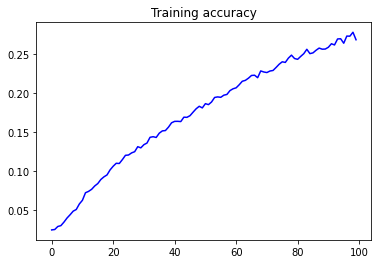

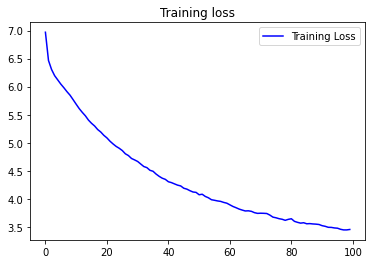

In [38]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [35]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted =   np.argmax(model.predict(token_list), axis=-1) #model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Help me Obi Wan Kenobi, you're my only hope the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the
